###  MicroGrad demo

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
# Define the MLP: 2 inputs, one hidden layer with 3 neurons, 1 output
mlp = MLP(2, [3, 1])

# Print the MLP structure
print(mlp)

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [LinearNeuron(3)]]


In [5]:
# Access the parameters (weights and biases)
params = mlp.parameters()

# Check the first few parameters' children
for i, param in enumerate(params[:3]):  # Limit to first 3 for brevity
    print(f"Parameter {i}: Value = {param.data}, Children = {param._prev}")

Parameter 0: Value = -0.8078288347041886, Children = set()
Parameter 1: Value = -0.1641490356795996, Children = set()
Parameter 2: Value = 0, Children = set()


In [6]:
# Input data
x = [1.0, 2.0]

# Forward pass through the MLP
output = mlp(x)

# Print the output
print(f"Output after forward pass: {output}")

Output after forward pass: Value(data=-0.41262056831798055, grad=0, op=+, prev=2)


In [9]:
params = mlp.parameters()

# Check the output's children
print(f"Output value: {output.data}, Children: {output._prev}")

# Re-check some parameters' children
for i, param in enumerate(params[:3]):
    print(f"Parameter {i}: Value = {param.data}, Children = {param._prev}")

Output value: -0.41262056831798055, Children: {Value(data=-0.4219583255586411, grad=0, op=*, prev=2), Value(data=0.009337757240660572, grad=0, op=+, prev=2)}
Parameter 0: Value = -0.8078288347041886, Children = set()
Parameter 1: Value = -0.1641490356795996, Children = set()
Parameter 2: Value = 0, Children = set()


In [10]:
# Create MLP and perform forward pass (from previous steps)
mlp = MLP(2, [3, 1])
x = [1.0, 2.0]
output = mlp(x)

# Step 4: Inspect the computation graph
print(f"\nOutput value: {output.data}, Children: {output._prev}")

# Dive deeper into the children of the output
for i, child in enumerate(output._prev):
    print(f"Child {i}: Value = {child.data}, Operation = {child._op}, Children = {child._prev}")

# Check parameters and see if they're in the graph
params = mlp.parameters()
print("\nParameters (checking if they contribute to the graph):")
for i, param in enumerate(params[:3]):
    print(f"Parameter {i}: Value = {param.data}, Children = {param._prev}")
    # Check if this parameter appears in any child's _children set
    for child in output._prev:
        if param in child._prev:
            print(f"  -> Found in children of intermediate value {child.data}")


Output value: -0.21581152029591275, Children: {Value(data=0.0, grad=0, op=*, prev=2), Value(data=-0.21581152029591275, grad=0, op=+, prev=2)}
Child 0: Value = 0.0, Operation = *, Children = {Value(data=0, grad=0, op=ReLU, prev=1), Value(data=0.39041912318756244, grad=0, op=, prev=0)}
Child 1: Value = -0.21581152029591275, Operation = +, Children = {Value(data=-0.08973014682166094, grad=0, op=*, prev=2), Value(data=-0.1260813734742518, grad=0, op=+, prev=2)}

Parameters (checking if they contribute to the graph):
Parameter 0: Value = -0.27919213081311844, Children = set()
Parameter 1: Value = 0.5174931010007706, Children = set()
Parameter 2: Value = 0, Children = set()


In [11]:
a = Value(5.0)
b = Value(-2.0)
c = Value(-3.0)
d = a + b + c

In [ ]:
d._prev

SyntaxError: invalid syntax (1473435058.py, line 1)

In [6]:
np.random.seed(1337)
random.seed(1337)

In [41]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

ModuleNotFoundError: No module named 'sklearn'

In [14]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [31]:
# since there's been no forward pass yet, the model is not aware of its structure and Values have no children
model.layers[1].neurons[0].parameters()
model.layers[0].parameters()

[Value(data=-0.5682926302627058, grad=0, op=, prev=0),
 Value(data=0.6485860735190656, grad=0, op=, prev=0),
 Value(data=0, grad=0, op=, prev=0),
 Value(data=0.7557808231161958, grad=0, op=, prev=0),
 Value(data=-0.46254834824274327, grad=0, op=, prev=0),
 Value(data=0, grad=0, op=, prev=0),
 Value(data=0.081981194050055, grad=0, op=, prev=0),
 Value(data=-0.8284462887910597, grad=0, op=, prev=0),
 Value(data=0, grad=0, op=, prev=0),
 Value(data=0.8576152515559483, grad=0, op=, prev=0),
 Value(data=-0.031263958563175986, grad=0, op=, prev=0),
 Value(data=0, grad=0, op=, prev=0),
 Value(data=-0.697458226510302, grad=0, op=, prev=0),
 Value(data=-0.7829172944478577, grad=0, op=, prev=0),
 Value(data=0, grad=0, op=, prev=0),
 Value(data=-0.5904110986733866, grad=0, op=, prev=0),
 Value(data=0.7993030420720448, grad=0, op=, prev=0),
 Value(data=0, grad=0, op=, prev=0),
 Value(data=0.40895208268170524, grad=0, op=, prev=0),
 Value(data=-0.673767460109429, grad=0, op=, prev=0),
 Value(data=0

In [32]:
out = model([0.5, 0.5])
out._prev

{Value(data=-0.0, grad=0, op=*, prev=2),
 Value(data=-0.007953229932089079, grad=0, op=+, prev=2)}

In [38]:
# now that there's been a forward pass, the model has a structure and Values have children
model.layers[2].neurons[0].parameters()

[Value(data=0.2645083268623749, grad=0, op=, prev=0),
 Value(data=-0.5163216538918469, grad=0, op=, prev=0),
 Value(data=0.716122676765655, grad=0, op=, prev=0),
 Value(data=0.07015402030829954, grad=0, op=, prev=0),
 Value(data=-0.969207275622398, grad=0, op=, prev=0),
 Value(data=-0.25713401363148525, grad=0, op=, prev=0),
 Value(data=0.7428499643811821, grad=0, op=, prev=0),
 Value(data=0.7216815617806285, grad=0, op=, prev=0),
 Value(data=0.28106083759255984, grad=0, op=, prev=0),
 Value(data=-0.33180150494767036, grad=0, op=, prev=0),
 Value(data=0.2509957176386708, grad=0, op=, prev=0),
 Value(data=0.1708285422566571, grad=0, op=, prev=0),
 Value(data=-0.5371271352847091, grad=0, op=, prev=0),
 Value(data=0.48652616485562983, grad=0, op=, prev=0),
 Value(data=0.9412500464409985, grad=0, op=, prev=0),
 Value(data=-0.4859730917921714, grad=0, op=, prev=0),
 Value(data=0, grad=0, op=, prev=0)]

In [6]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.8958441028683222, grad=0) 0.5


In [7]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 0.8958441028683222, accuracy 50.0%
step 1 loss 1.7235905336972022, accuracy 81.0%
step 2 loss 0.7429006313851131, accuracy 77.0%
step 3 loss 0.7705641260584198, accuracy 82.0%
step 4 loss 0.3692793385976538, accuracy 84.0%
step 5 loss 0.313545481918522, accuracy 86.0%
step 6 loss 0.2814234349772435, accuracy 89.0%
step 7 loss 0.26888733313983904, accuracy 91.0%
step 8 loss 0.2567147286057417, accuracy 91.0%
step 9 loss 0.2704862551637922, accuracy 91.0%
step 10 loss 0.24507023853658053, accuracy 91.0%
step 11 loss 0.2509905529791503, accuracy 92.0%
step 12 loss 0.21560951851922952, accuracy 91.0%
step 13 loss 0.23090378446402726, accuracy 93.0%
step 14 loss 0.20152151227899445, accuracy 92.0%
step 15 loss 0.22574506279282217, accuracy 93.0%
step 16 loss 0.19447987596204114, accuracy 92.0%
step 17 loss 0.21089496199246363, accuracy 93.0%
step 18 loss 0.159830773563036, accuracy 94.0%
step 19 loss 0.1845374874688392, accuracy 93.0%
step 20 loss 0.18977522856087634, accuracy 9

(-1.548639298268643, 1.951360701731357)

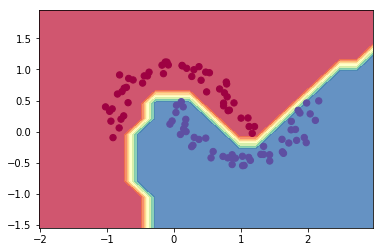

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
